Multiple Linear Regression attempts to model the relationship between two or more features and a response by fitting a linear equation to observed data

Assumption of Regression Model :

Linearity: The relationship between dependent and independent variables should be linear.

Homoscedasticity: Constant variance of the errors should be maintained.

Multivariate normality: Multiple Regression assumes that the residuals are normally distributed.

Lack of Multicollinearity: It is assumed that there is little or no multicollinearity in the data.

In [0]:
#1 Importing the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
#2 Importing the dataset:
dataset = pd.read_csv('https://raw.githubusercontent.com/Uttam580/Machine_learning/master/datasets./50_Startups.csv')

In [3]:
dataset.head(4)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99


In [4]:
dataset.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [0]:
#Y: dependent variable vector
#In the first run X’s type is object due to the different types of #independent variables.State column contains categorical variables
X= dataset.iloc[:, :-1].values
Y=dataset.iloc[:, 4].values

In [6]:
X[1:5]

array([[162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida']], dtype=object)

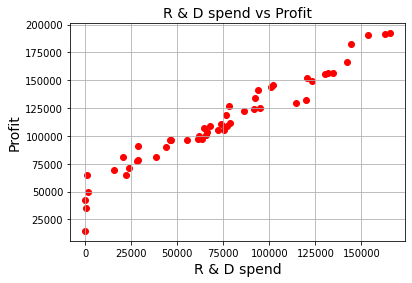

In [62]:
plt.scatter(dataset['R&D Spend'], dataset['Profit'], color='red')
plt.title('R & D spend vs Profit', fontsize=14)
plt.xlabel('R & D spend', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.grid(True)
plt.show()

In [0]:
#3 Encoding the categorical variables:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
#turn the numbers to dummy variables. Each column represents one #state compare the X and dataset tables to understand the #relationship between the state and the columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')#(name, object, column)
X = np.array(ct.fit_transform(X))
X= X[:,1:]# to avoid dummy variable trap

In [8]:
X[1:5]

array([[0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 142107.34, 91391.77, 366168.42]], dtype=object)

In [0]:
#5 Splitting the dataset into the Training and Test dataset
#train_set_split: Split arrays or matrices into random train and #test subsets. %20 of the dataset to the test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=0)

In [10]:
#6 Fit multiple Linear Regression model to our Train set
from sklearn.linear_model import LinearRegression
#Create an object called regressor in the LinearRegression class…
regressor = LinearRegression()
#Fit the linear regression model to the training set… We use the fit #method the arguments of the fit method will be training sets
 
regressor.fit(X_train,Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#7 Predicting the Test set results:
Y_pred= regressor.predict(X_test)

In [12]:
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[103015.20159796 103282.38      ]
 [132582.27760816 144259.4       ]
 [132447.73845175 146121.95      ]
 [ 71976.09851259  77798.83      ]
 [178537.48221054 191050.39      ]
 [116161.24230163 105008.31      ]
 [ 67851.69209676  81229.06      ]
 [ 98791.73374688  97483.56      ]
 [113969.43533012 110352.25      ]
 [167921.0656955  166187.94      ]]


In [0]:
# model evaluation
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(Y_test, Y_pred)

In [0]:
r2 =r2_score(Y_test, Y_pred)


In [15]:
# printing values
print('Slope:' ,regressor.coef_)
print('Intercept:', regressor.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [-9.59284160e+02  6.99369053e+02  7.73467193e-01  3.28845975e-02
  3.66100259e-02]
Intercept: 42554.167617767
Root mean squared error:  83502864.03250548
R2 score:  0.9347068473282987


**Method of Building Models :**

All-in

Backward-Elimination

Forward Selection

Bidirectional Elimination

Score Comparison

**Backward Elimination**
 
 The features have little impact on the result. So that it should be eliminated some of the independent variables to prevent the shadow on the output. We build the optimal model using Backward Elimination


In [16]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


![alt text](https://miro.medium.com/max/1400/1*Jub_nEYtN0htxFpTRzRtBQ.png)

In [0]:
#The 0th column contains only 1 in each 50 rows
#Beta0 has x0=1. Add a column of for the the first term of the #MultiLinear Regression equation.
X= np.append(arr = np.ones((50,1)).astype(int), values = X, axis=1) 

In [18]:
X[1:3]

array([[1, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1, 1.0, 0.0, 153441.51, 101145.55, 407934.54]], dtype=object)

In [39]:
X.dtype

dtype('O')

In [0]:
 X1= X.astype(np.float64)

In [34]:
X1[1:2]

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05]])

In [38]:
X1.dtype

dtype('float64')

![alt text](https://lh3.googleusercontent.com/proxy/YzhGo7jYEMNz03XgFIVVfiyhM28hZd9Dwq0noYnTe07CU-4xtxS3gold-kAH_-iBmg8HY9nq2qIFtOnb8BFKx72NPaDLBjUQ1TeeHWc2mb-Fl79YguYuZNqVYEfM)

In [36]:
#Optimal X contains the highly impacted independent variables
#OLS: Oridnary Least Square Class. endog is the dependent variable, #exog is the number of observations
X_opt = X1[:,[0,1,2,3,4,5]]
ols = sm.OLS(endog=Y, exog=X_opt).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 06 Jun 2020   Prob (F-statistic):           1.34e-27
Time:                        03:13:21   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.0

x1, x2 are dummy variables, x3 is R&D spend, x4 is Administration spend, and x5 is Marketing spend.

we will choose the highest p-value, which is for x1=0.953 Now, we have the highest p-value which is greater than the SL value, so will remove the x1 variable (dummy variable) from the table and will refit the model. Below is the code for i

In [41]:
X_opt=X1[:, [0,2,3,4,5]]  
regressor_OLS=sm.OLS(endog = Y, exog=X_opt).fit()  
print(regressor_OLS.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sat, 06 Jun 2020   Prob (F-statistic):           8.50e-29
Time:                        03:33:34   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.018e+04   6747.623      7.437      0.0

now five variables remain. In these variables, the highest p-value is 0.961. So we will remove it in the next iteration.

Now the next highest value is 0.961 for x1 variable, which is another dummy variable. So we will remove it and refit the model. Below is the code for it:

In [43]:
X_opt=X1[:, [0,3,4,5]]  
regressor_OLS=sm.OLS(endog = Y, exog=X_opt).fit()  
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 06 Jun 2020   Prob (F-statistic):           4.53e-30
Time:                        03:35:41   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.0

 we can see the dummy variable(x2) has been removed. And the next highest value is .602, which is still greater than .5, so we need to remove it.

Now we will remove the Admin spend which is having .602 p-value and again refit the model.

In [44]:
X_opt=X1[:, [0,3,5]]  
regressor_OLS=sm.OLS(endog = Y, exog=X_opt).fit()  
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sat, 06 Jun 2020   Prob (F-statistic):           2.16e-31
Time:                        03:37:39   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.0

 the variable (Admin spend) has been removed. But still, there is one variable left, which is marketing spend as it has a high p-value (0.60). So we need to remove it.

Finally, we will remove one more variable, which has .60 p-value for marketing spend, which is more than a significant level.
Below is the code for it:

In [45]:
X_opt=X1[:, [0,3]]  
regressor_OLS=sm.OLS(endog = Y, exog=X_opt).fit()  
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sat, 06 Jun 2020   Prob (F-statistic):           3.50e-32
Time:                        03:44:19   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.0

So only the R&D independent variable is a significant variable for the prediction. So we can now predict efficiently using this variable.

In [48]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [0]:
X_new= dataset.iloc[:, 0].values
Y_new=dataset.iloc[:, 4].values

In [52]:
X_new[1:3], Y_new[1:3]

(array([162597.7 , 153441.51]), array([191792.06, 191050.39]))

In [0]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
X_new_train , X_new_test, Y_new_train, Y_new_test= train_test_split(X_new,Y_new, test_size= 0.2, random_state=0)  

In [54]:
#Fitting the MLR model to the training set:  
from sklearn.linear_model import LinearRegression  
new_regressor= LinearRegression()  
new_regressor.fit(np.array(X_new_train).reshape(-1,1), Y_new_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
new_pred = new_regressor.predict(X_new_test.reshape(-1,1))

In [0]:
# model evaluation
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(Y_new_test, new_pred)

In [0]:
r2 = r2_score(Y_new_test,new_pred)

In [60]:
# printing values
print('Slope:' ,new_regressor.coef_)
print('Intercept:', new_regressor.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [0.8516228]
Intercept: 48416.297661385026
Root mean squared error:  68473440.71905932
R2 score:  0.9464587607787219


**Forward-Selection :**

Step #1 : Select a significance level to enter the model(e.g. SL = 0.05)

Step #2 : Fit all simple regression models y~ x(n). Select the one with the lowest P-value .

Step #3 : Keep this variable and fit all possible models with one extra predictor added to the one(s) you already have.

Step #4 : Consider the predictor with lowest P-value. If P < SL, go to Step #3, otherwise model is Ready.

